# A Demo of VAE for Handwritten Number Generation
-------

## Variational Autoencoder

In [ ]:
!python train_VAE.py #skip this if the model has been trained before

In [1]:
import torch
from matplotlib import pyplot as plt
from matplotlib import cm

## Conditional Variational Autoencoder

In [ ]:
!python train_cVAE.py #skip this if the model has been trained before

In [2]:
from models.cvae import cVAE

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

net = cVAE((1, 28, 28), nclass = 10, nhid = 2, ncond = 16)
checkpoint = torch.load("cVAE.pt", map_location = device)
net.load_state_dict(checkpoint["net"])
net.to(device)
net.eval()

cVAE(
  (encoder): Encoder(
    (encode): Sequential(
      (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
      (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (14): Flatten()
      (15): MLP(
    

Here is an illustration of a generated handwritten `number`. You can assign an arbitrary digit from 0~9 for `number`.

In [4]:
number = 0

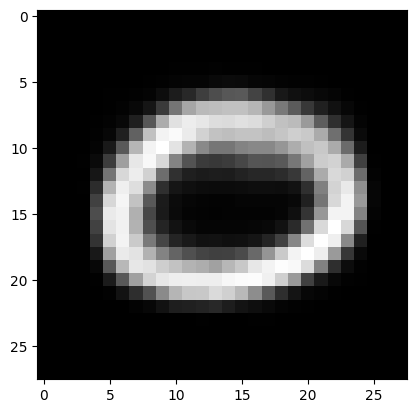

In [5]:
with torch.no_grad():
    x = net.generate(number)
plt.imshow(x.squeeze(0).cpu().numpy(), cm.gray)

Here are 40 samples generated by the model, from which we can see the variation of its generation.

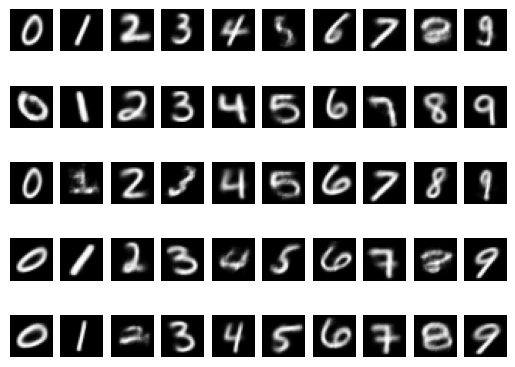

In [6]:
with torch.no_grad():
    x = net.generate(torch.tensor([list(range(10))] * 5).clone().view(-1))
    
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis("off")
    plt.imshow(x[i].squeeze(0).cpu().numpy(), cm.gray)